# Datacamp \#1: accidents de la route

Déroulement général de la séance :
- explorer la donnée
- choisir une problématique / des questions 
- identifier les variables pertinentes
- faire les calculs, la visu nécessaire

Nous souhaitons vous donner quelques exemples de problématiques : 
- En cas d’accident, prédire sa gravité en fonction des conditions de la conduite. Facteurs liés à la gravité de l’accident.
- Analyse d’évolution temporelle / spatiale de différentes catégorie d’accidents.
- La “place du mort”
- Être piéton: quels risques ?
- Accidents et manoeuvres routières
- Clustering: si on devait résumer la base en K types d’accidents, quels seraient-ils ? 

-----------------

Attention : nous avons accès à des informations d’accidents, mais nous n'avons pas d'information sur tout les non-accidents! Il faudra donc faire assez attention à la formulation des questions que l'on se pose, et surtout, aux conclusions que l'on peut se permettre de tirer des données. Un exemple typique: on ne peut affirmer qu'un endroit A est plus "à risque" qu'un endroit B, basé simplement sur le nombre d'accidents observés dans ces deux endroits. En effet, il suffit que A soit bien plus fréquenté que B pour expliquer les différences, et comme cette information nous est inconnue, nous sommes bloqués.

https://github.com/FredericLoge/misc/tree/main/accidents_data

# Load datasets

In [ ]:
# pandas : read, wrangle, plot data
import pandas as pd

# github data folder, to facilitate data import (especially for Colab users !)
github_data_folder = 'https://raw.githubusercontent.com/FredericLoge/misc/main/accidents_data/'

# read function
def my_read(url):
  return pd.read_csv(url, compression='gzip', encoding = "latin1") # , encoding = "ISO-8859-1")

In [ ]:
# read the four datasets
caracteristiques = my_read(github_data_folder + 'caracteristiques_cleaned.csv.gz')
lieux = my_read(github_data_folder + 'lieux_cleaned.csv.gz')
usagers = my_read(github_data_folder + 'usagers_cleaned.csv.gz')
vehicules = my_read(github_data_folder + 'vehicules_cleaned.csv.gz')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


# Code samples

In [ ]:
# check on column names
print('\n Columns of "caracteristiques"')
print(caracteristiques.columns)
print('\n Columns of "usagers"')
print(usagers.columns)


 Columns of "caracteristiques"
Index(['Num_Acc', 'date', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'adr',
       'gps', 'lat', 'long', 'dep'],
      dtype='object')

 Columns of "usagers"
Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'secup', 'secuu',
       'locp', 'actp', 'etatp', 'an_nais', 'num_veh'],
      dtype='object')


In [ ]:
# count modalities of a categorical variable 
caracteristiques['int'].value_counts()

Hors intersection                     679626
Intersection en X                     117058
Intersection en T                      85556
Giratoire                              26548
Autre intersection                     16784
Intersection en Y                      13894
Intersection Ã  plus de 4 branches     10156
Place                                   7644
Passage Ã  niveau                       1096
Name: int, dtype: int64

In [ ]:
# merge datasets
# attention : they might be two key IDs (Num_Acc, Num_veh)
caract_usagers = caracteristiques.merge(usagers, left_on = 'Num_Acc', right_on = 'Num_Acc')
caract_usagers.head(6)

,Num_Acc,date,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,place,catu,grav,sexe,trajet,secup,secuu,locp,actp,etatp,an_nais,num_veh
0,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,1.0,Conducteur,BlessÃ© lÃ©ger,Masculin,Domicile â travail,Ceinture,Oui,NaN,NaN,NaN,1976.0,A01
1,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,1.0,Conducteur,BlessÃ© hospitalisÃ©,FÃ©minin,Courses â achats,Ceinture,Oui,NaN,NaN,NaN,1968.0,B02
2,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,2.0,Passager,Indemne,Masculin,NaN,Ceinture,Oui,NaN,NaN,NaN,1964.0,B02
3,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,4.0,Passager,Indemne,Masculin,NaN,Dispositif enfants,Oui,NaN,NaN,NaN,2004.0,B02
4,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,5.0,Passager,Indemne,Masculin,NaN,Ceinture,Oui,NaN,NaN,NaN,1998.0,B02
5,200500000001,2005-01-12T19:00:00Z,Nuit sans Ã©clairage public,En agglomÃ©ration,Hors intersection,Normale,Deux vÃ©hicules â par le cotÃ©,11.0,CD41B,MÃ©tropole,50.515,2.944,590,3.0,Passager,Indemne,FÃ©minin,NaN,Ceinture,Oui,NaN,NaN,NaN,1991.0,B02


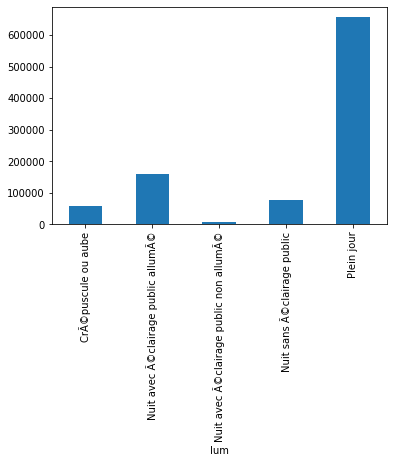

In [ ]:
# barplot
# -> for wider plot options, use seaborn, matplotlib, plotly etc
x = caracteristiques.groupby('lum')['lum'].count()
x.plot.bar()